In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("covid_instagram.csv")

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])
df["Year"] = df["Date"].dt.year

In [20]:
print(df["Date"].head(3))
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y", errors="coerce")

0   2020-01-21
1   2020-01-22
2   2020-01-22
Name: Date, dtype: datetime64[ns]


0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
500148    2024
500149    2024
500150    2024
500151    2024
500152    2024
Name: Year, Length: 500153, dtype: int32


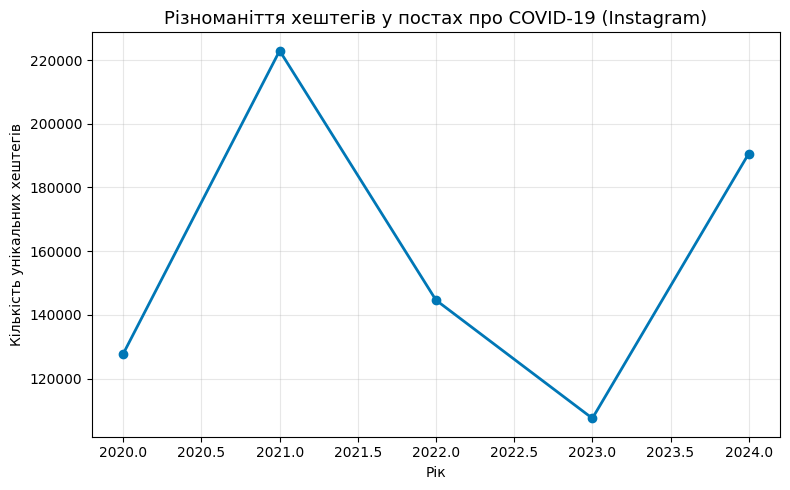

   Year  unique_hashtags
0  2020           127837
1  2021           222936
2  2022           144626
3  2023           107527
4  2024           190628


In [ ]:
print(df["Year"])

def extract_hashtags(text):
    if not isinstance(text, str):
        return []
    return re.findall(r"#\w+", text)

df["hashtags"] = df["Post Description"].apply(extract_hashtags)

df_tags = df.explode("hashtags").dropna(subset=["hashtags"])

yearly_diversity = (
    df_tags.groupby("Year")["hashtags"]
    .nunique()
    .reset_index()
    .rename(columns={"hashtags": "unique_hashtags"})
)

plt.figure(figsize=(8,5))
plt.plot(
    yearly_diversity["Year"],
    yearly_diversity["unique_hashtags"],
    marker="o",
    linewidth=2,
    color="#0077b6"
)
plt.title("Різноманіття хештегів у постах про COVID-19 (Instagram)", fontsize=13)
plt.xlabel("Рік")
plt.ylabel("Кількість унікальних хештегів")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(yearly_diversity)

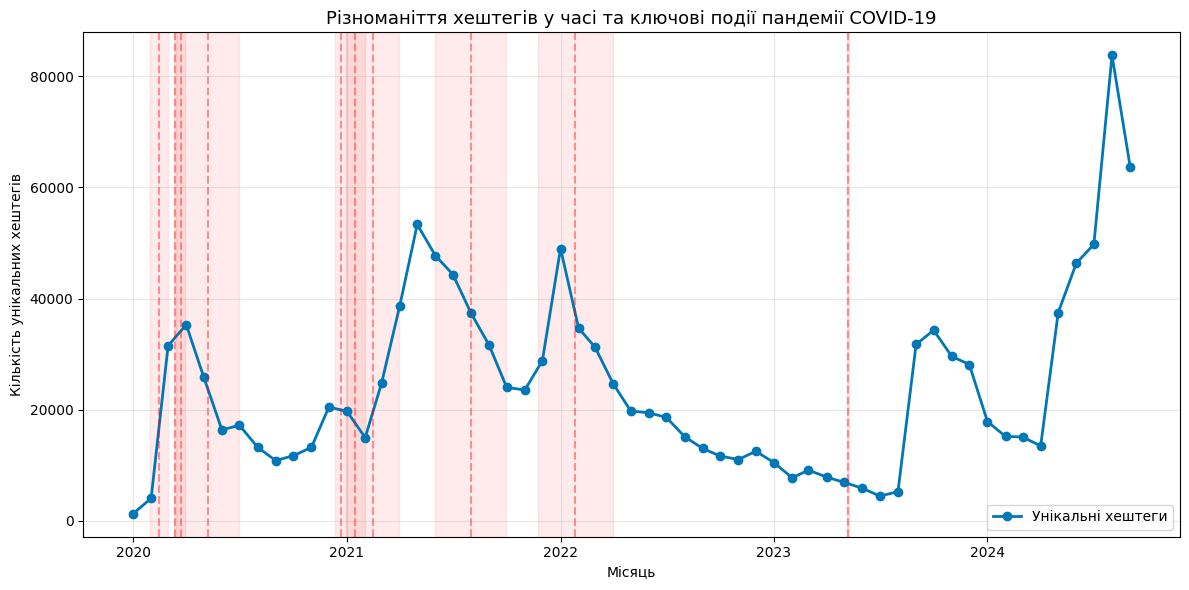

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).copy()
df["YearMonth"] = df["Date"].dt.to_period("M").dt.to_timestamp()

def extract_hashtags(text):
    if not isinstance(text, str):
        return []
    return re.findall(r"#\w+", text)


df_tags = df.explode("hashtags").dropna(subset=["hashtags"])

monthly_diversity = (
    df_tags.groupby("YearMonth")["hashtags"]
    .nunique()
    .reset_index()
    .rename(columns={"hashtags": "unique_hashtags"})
)

events = pd.read_csv("covid_events.csv")
events["start_date"] = pd.to_datetime(events["start_date"], errors="coerce")
events["end_date"] = pd.to_datetime(events["end_date"], errors="coerce")
events["mid_date"] = events["start_date"] + (events["end_date"] - events["start_date"]) / 2

plt.figure(figsize=(12,6))
plt.plot(
    monthly_diversity["YearMonth"],
    monthly_diversity["unique_hashtags"],
    marker="o",
    linewidth=2,
    color="#0077b6",
    label="Унікальні хештеги"
)

for _, ev in events.iterrows():
    plt.axvspan(ev["start_date"], ev["end_date"], color="red", alpha=0.08)
    plt.axvline(ev["mid_date"], color="red", linestyle="--", alpha=0.4)

plt.title("Різноманіття хештегів у часі та ключові події пандемії COVID-19", fontsize=13)
plt.xlabel("Місяць")
plt.ylabel("Кількість унікальних хештегів")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
first_use = df_tags.groupby("hashtags")["Date"].min().dt.year
new_tags_per_year = first_use.value_counts().sort_index()

/var/folders/83/xmvd7nss7dd2h1173mbzfmn00000gn/T/ipykernel_72891/3507066047.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.show()


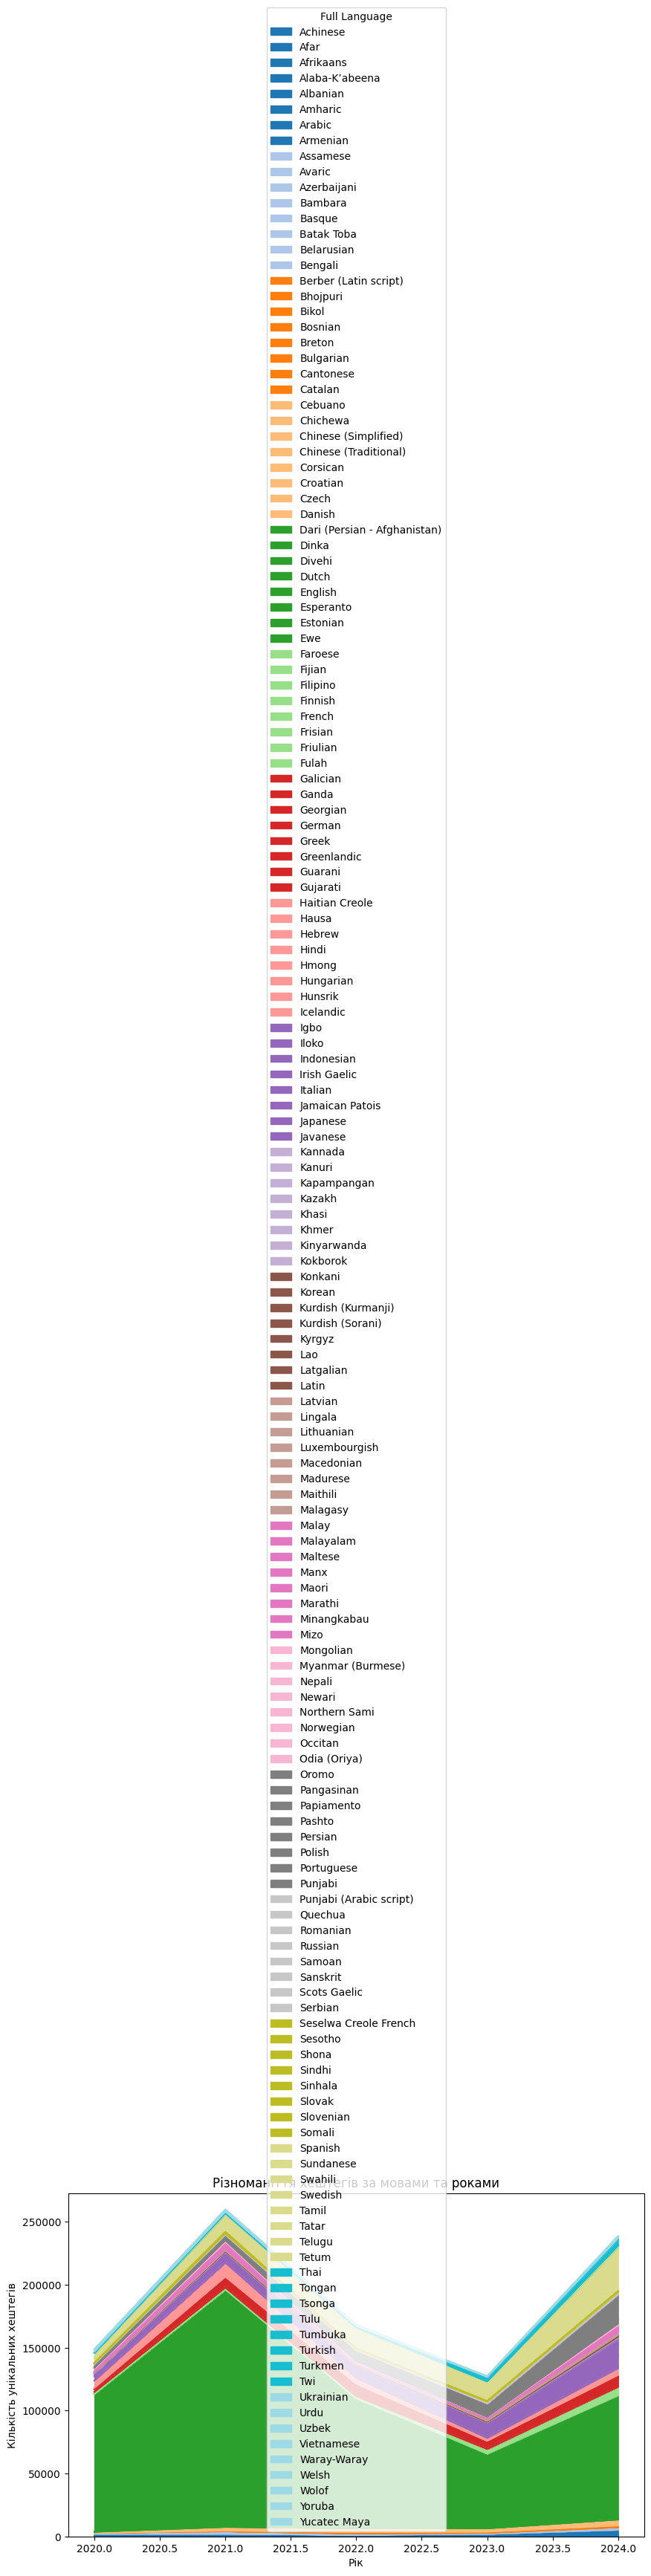

In [ ]:
yearly_lang_div = (
    df_tags.groupby(["Year","Full Language"])["hashtags"]
    .nunique()
    .reset_index()
)

pivot = yearly_lang_div.pivot(index="Year", columns="Full Language", values="hashtags").fillna(0)
pivot.plot(kind="area", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Різноманіття хештегів за мовами та роками")
plt.xlabel("Рік"); plt.ylabel("Кількість унікальних хештегів")
plt.tight_layout(); plt.show()